<center>
    
# Big Five Personality Prediction


![](https://c8.alamy.com/comp/2DD22K4/diagram-of-big-five-personality-traits-with-keywords-eps-10-isolated-on-white-background-2DD22K4.jpg)

# The Big Five personality traits are:

1. Openness :
People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

2. Conscientiousness :
People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

3.  Extraversion :
Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

4.  Agreeableness :
These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

5.  Neuroticism :
Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('../input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv', delimiter='\t')

In [3]:
print(train.shape)
train.head(3)


(1015341, 110)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833


In [4]:
#Check Missing Value
print('Is there any missing value? ', train.isnull().values.any())
print('How many missing values? ', train.isnull().values.sum())
train.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(train))

Is there any missing value?  True
How many missing values?  186358
Number of participants after eliminating missing values:  1012050


In [5]:
data = train.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1012050


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [6]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

# Q&As Related to Extroversion Personality¶
* EXT1 : I am the life of the party,
* EXT2 : I dont talk a lot,
* EXT3 : I feel comfortable around people,
* EXT4 : I keep in the background,
* EXT5 : I start conversations,
* EXT6 : I have little to say,
* EXT7 : I talk to a lot of different people at parties,
* EXT8 : I dont like to draw attention to myself,
* EXT9 : I dont mind being the center of attention,
* EXT10: I am quiet around strangers

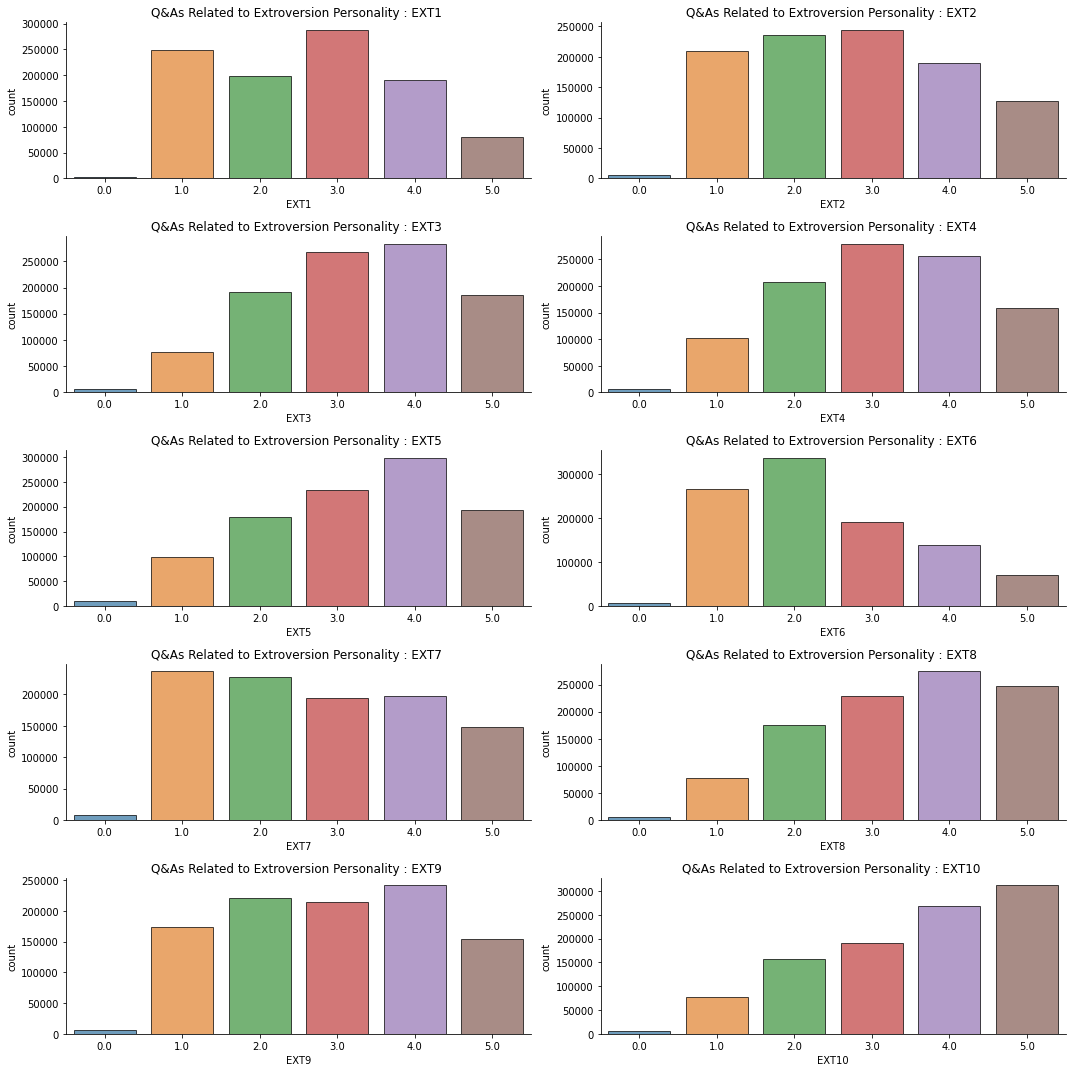

In [7]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
n=1
for f in EXT:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# Q&As Related to Neuroticism Personality
* EST1 : I get stressed out easily,
* EST2 : I am relaxed most of the time,
* EST3 : I worry about things,
* EST4 : I seldom feel blue,
* EST5 : I am easily disturbed,
* EST6 : I get upset easily,
* EST7 : I change my mood a lot,
* EST8 : I have frequent mood swings,
* EST9 : I get irritated easily,
* EST10: I often feel blue

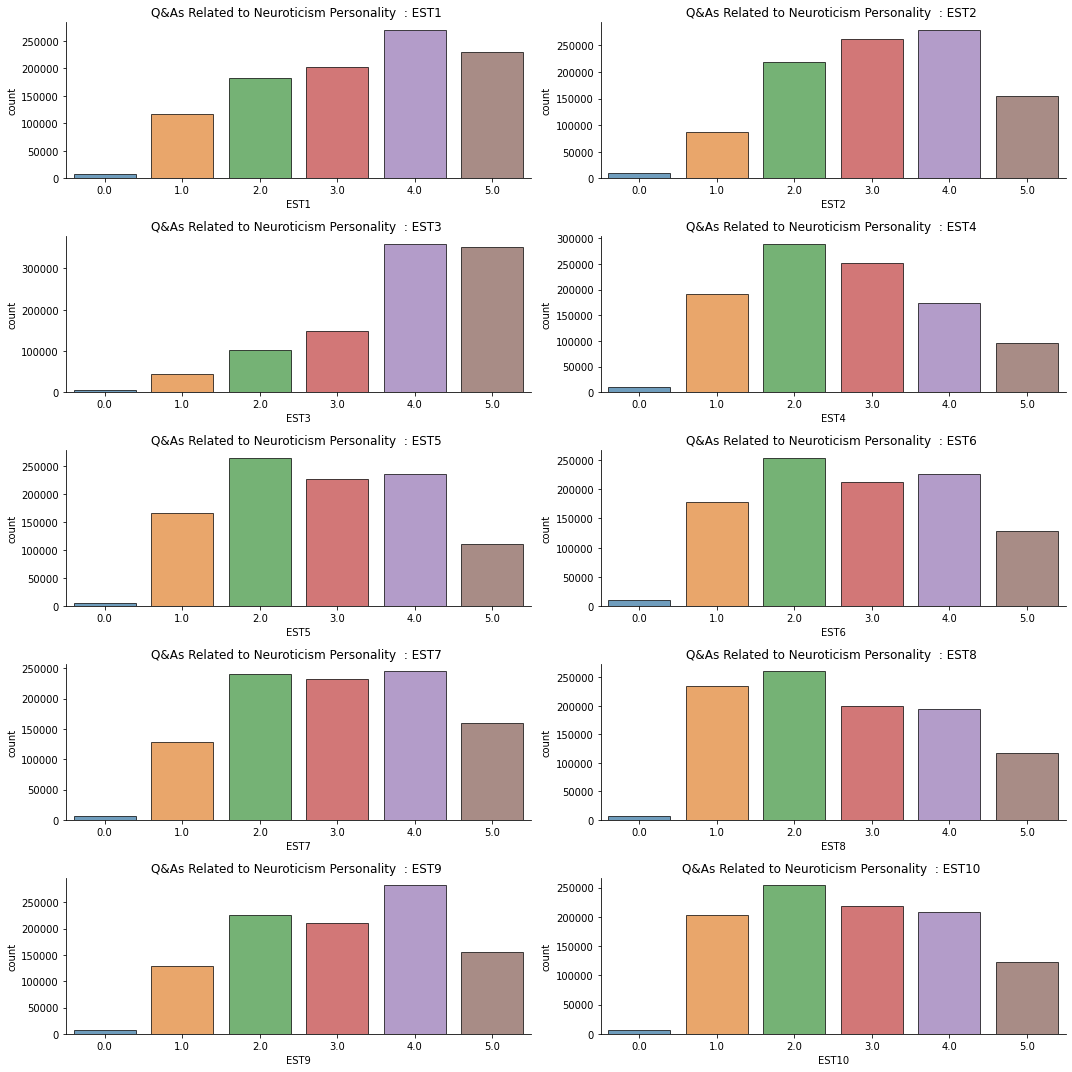

In [8]:
plt.figure(figsize=[15,15])
n=1
for i in EST:
    plt.subplot(5,2,n)
    sns.countplot(x=i,  edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality  : {} ".format(i))
    n=n+1
plt.tight_layout()
plt.show()

# Q&As Related to Agreeable Personality
* AGR1 : I feel little concern for others,
* AGR2 : I am interested in people,
* AGR3 : I insult people,
* AGR4 : I sympathize with others feelings,
* AGR5 : I am not interested in other peoples problems,
* AGR6 : I have a soft heart,
* AGR7 : I am not really interested in others,
* AGR8 : I take time out for others,
* AGR9 : I feel others emotions,
* AGR10: I make people feel at ease

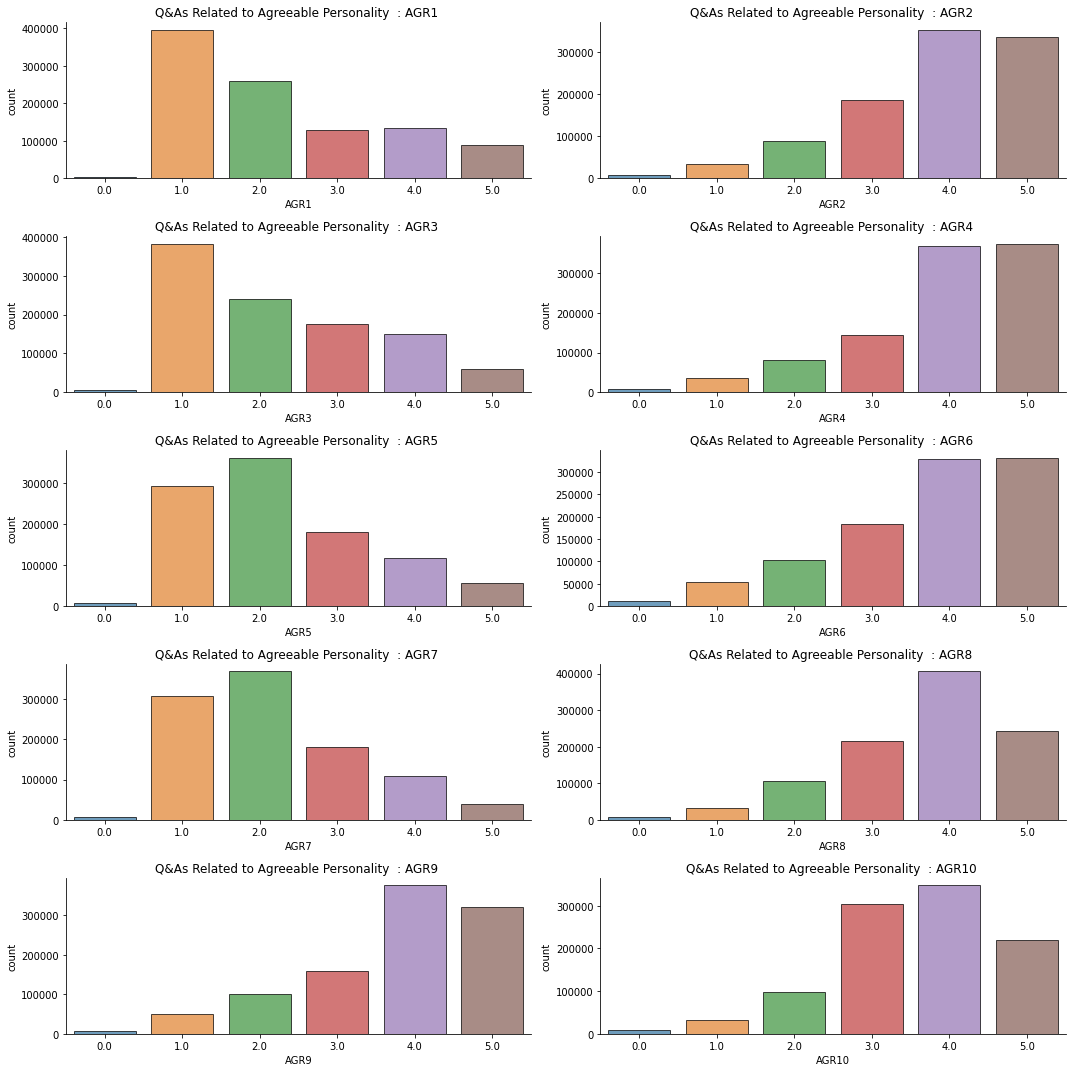

In [9]:
plt.figure(figsize=[15,15])
n=1
for i in AGR:
    plt.subplot(5,2,n)
    sns.countplot(x=i,  edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality  : {} ".format(i))
    n=n+1
plt.tight_layout()
plt.show()

# Q&As Related to Conscientious Personality
* CSN1 : I am always prepared,
* CSN2 : I leave my belongings around,
* CSN3 : I pay attention to details,
* CSN4 : I make a mess of things,
* CSN5 : I get chores done right away,
* CSN6 : I often forget to put things back in their proper place,
* CSN7 : I like order,
* CSN8 : I shirk my duties,
* CSN9 : I follow a schedule,
* CSN10 : I am exacting in my work

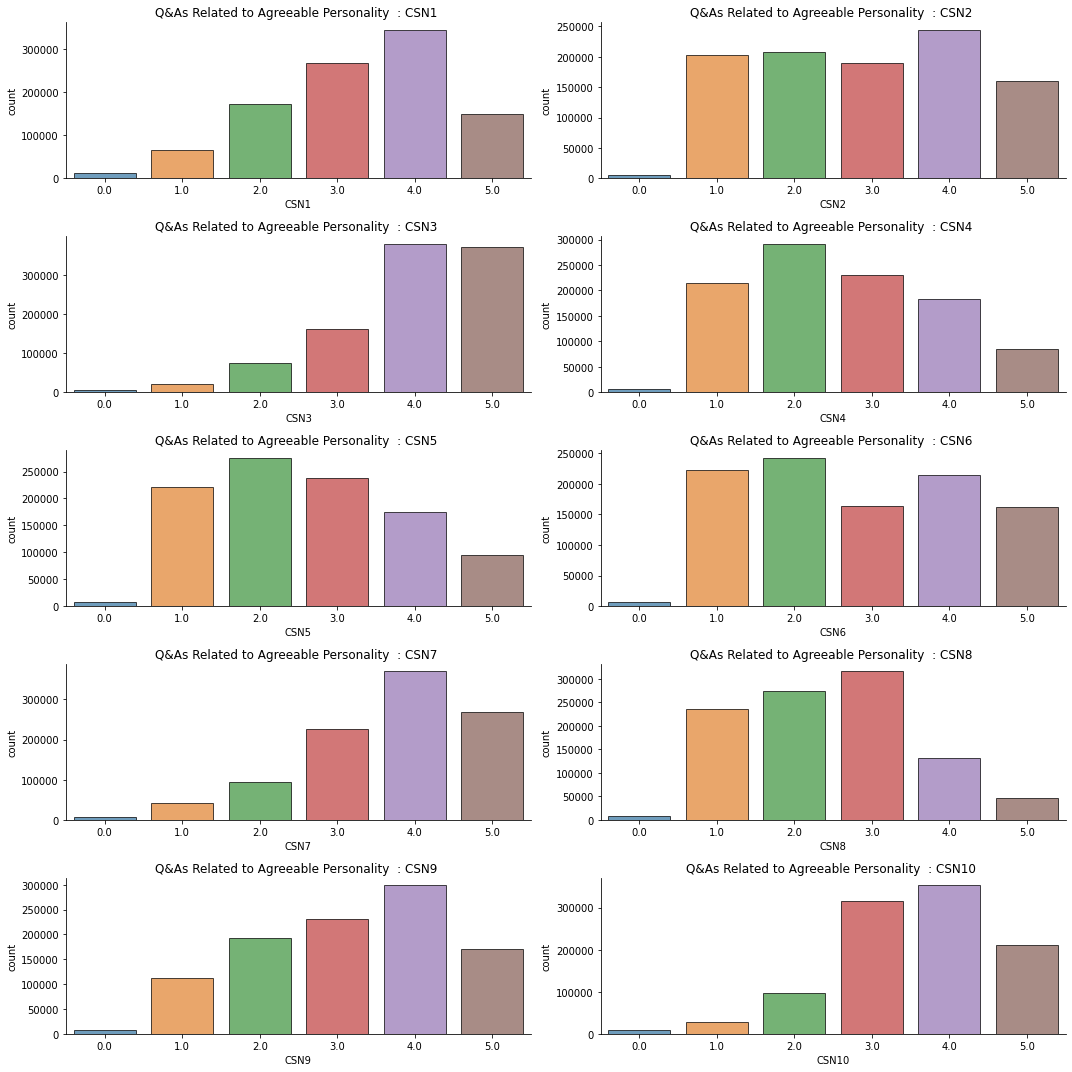

In [10]:
plt.figure(figsize=[15,15])
n=1
for i in CSN:
    plt.subplot(5,2,n)
    sns.countplot(x=i,  edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality  : {} ".format(i))
    n=n+1
plt.tight_layout()
plt.show()

# Q&As Related to Open Personality
* OPN1 : I have a rich vocabulary,
* OPN2 : I have difficulty understanding abstract ideas,
* OPN3 : I have a vivid imagination,
* OPN4 : I am not interested in abstract ideas,
* OPN5 : I have excellent ideas,
* OPN6 : I do not have a good imagination,
* OPN7 : I am quick to understand things,
* OPN8 : I use difficult words,
* OPN9 : I spend time reflecting on things,
* OPN10: I am full of ideas

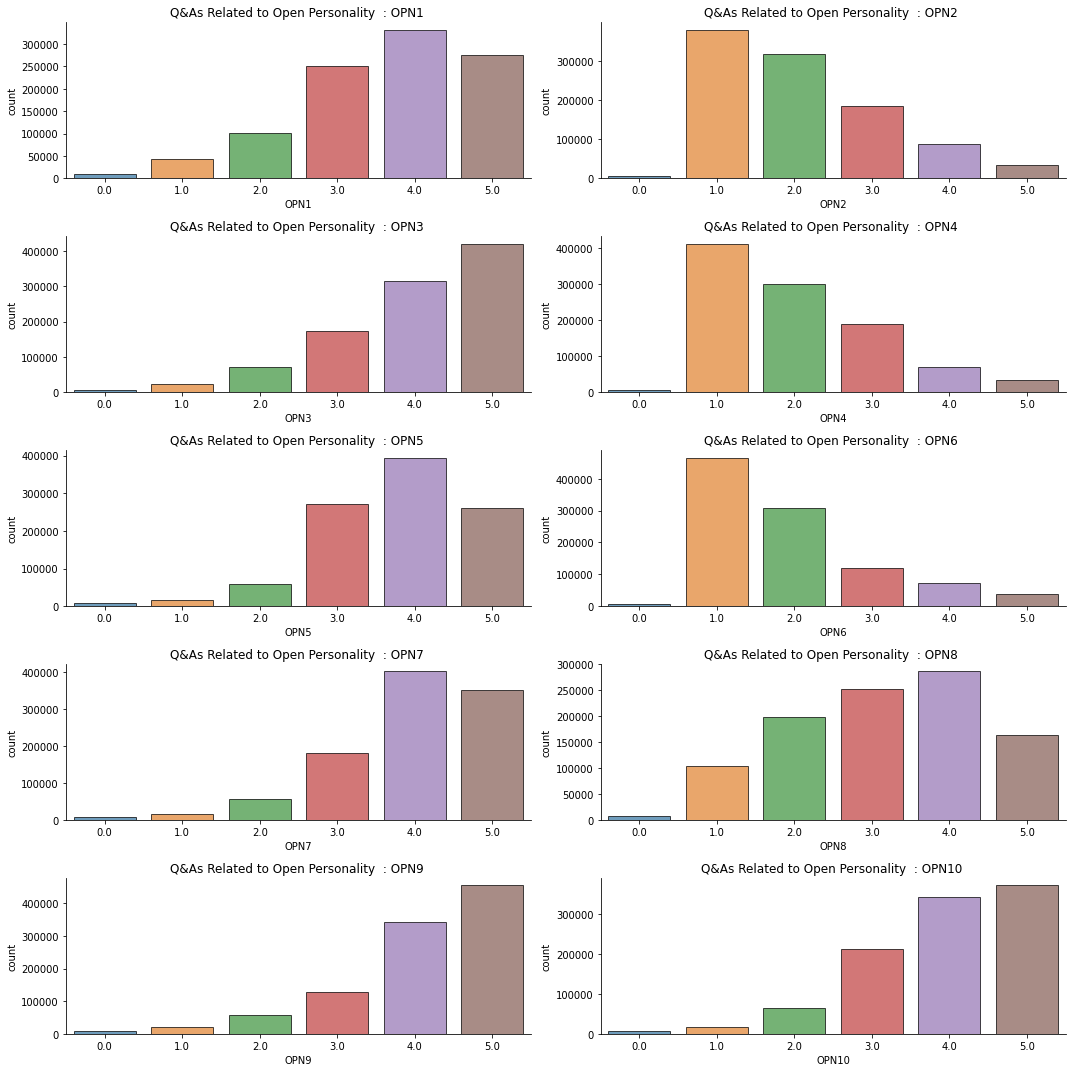

In [11]:
plt.figure(figsize=[15,15])
n=1
for i in OPN:
    plt.subplot(5,2,n)
    sns.countplot(x=i,  edgecolor="black", alpha=0.7, data=train)
    sns.despine()
    plt.title("Q&As Related to Open Personality  : {} ".format(i))
    n=n+1
plt.tight_layout()
plt.show()

In [12]:
continents=pd.read_csv('../input/country-mapping-iso-continent-region/continents2.csv')
print(continents.shape)
continents.describe()
print(continents.columns)

(249, 11)
Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')


In [13]:
data1=train.copy()
data1['alpha-2']=data1['country']
print(data1.shape)
data1.tail()

(1012050, 111)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,alpha-2
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,5694.0,3927.0,4600.0,5255.0,1688.0,2216.0,5064.0,3288.0,4207.0,3807.0,3607.0,3256.0,8575.0,1696.0,2016.0,5488.0,2456.0,3487.0,1655.0,2119.0,1655.0,1937.0,1233.0,3151.0,2576.0,1888.0,2815.0,2964.0,2665.0,2888.0,3008.0,2367.0,2504.0,2544.0,2144.0,4784.0,3529.0,5072.0,2016.0,3353.0,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,2382.0,1984.0,3696.0,1736.0,2272.0,2327.0,2088.0,2296.0,1585.0,3287.0,1752.0,1728.0,1279.0,1768.0,4503.0,1329.0,1640.0,1464.0,2183.0,953.0,2422.0,1448.0,3216.0,6160.0,2208.0,1513.0,2785.0,3833.0,3280.0,1184.0,2096.0,1880.0,3209.0,1744.0,4392.0,1943.0,2263.0,1559.0,1304.0,2176.0,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,4077.0,2120.0,1688.0,2528.0,1721.0,2711.0,5329.0,2080.0,2992.0,2952.0,1967.0,2305.0,1752.0,3096.0,3206.0,2825.0,2482.0,2358.0,1946.0,2416.0,2487.0,1863.0,1745.0,4040.0,4068.0,1480.0,4550.0,3000.0,5873.0,2088.0,5286.0,2232.0,2942.0,2296.0,1841.0,2303.0,1791.0,2744.0,1196.0,4719.0,2121.0,2807.0,1711.0,2335.0,1609.0,3007.0,2727.0,2648.0,2646.0,1287.0,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,8647.0,2664.0,3544.0,2263.0,2248.0,3024.0,4704.0,3383.0,2488.0,3183.0,2423.0,5807.0,1384.0,2696.0,2800.0,1847.0,4655.0,1232.0,5064.0,4921.0,2982.0,5584.0,2567.0,2168.0,6320.0,3055.0,2580.0,2816.0,2544.0,3744.0,5168.0,3903.0,37726.0,2735.0,1367.0,5056.0,3216.0,3320.0,2263.0,1415.0,5024.0,4664.0,4792.0,6471.0,1873.0,3136.0,3129.0,2799.0,7184.0,2526.0,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067,US
1015340,4.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,5.0,2.0,3.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,5.0,4425.0,2472.0,3163.0,2571.0,984.0,2853.0,2987.0,4771.0,3255.0,2918.0,2386.0,2269.0,1952.0,3037.0,2370.0,2370.0,1719.0,4572.0,3087.0,2352.0,6502.0,3751.0,3136.0,6857.0,6608.0,3870.0,8258.0,3037.0,2251.0,3853.0,5106.0,3087.0,3988.0,2469.0,2919.0,3020.0,3104.0,2252.0,4539.0,4539.0,5039.0,2493.0,2302.0,5072.0,1752.0,1935.0,7174.0,4037.0,3422.0,1769.0,2018-11-08 12:08:45,1920.0,1080.0,3.0,176.0,9,1,US,38.0,-97.0,US


# Extravert Personality

In [14]:
continents = data1.merge(continents, on=["alpha-2"], how='left')
continents.head()
continents.shape

(1012050, 121)

In [15]:
#Viz Ref: https://www.kaggle.com/dwin183287/kagglers-seen-by-continents
EP_lst = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10'] 
EP_df = continents.groupby(["region"])[EP_lst].count()
EP_df.columns = ['I am the life of the party','I dont talk a lot','I feel comfortable around people',
                'I keep in the background','I start conversations','I have little to say',
                'I talk to a lot of different people at parties','I dont like to draw attention to myself',
                'I dont mind being the center of attention','I am quiet around strangers']
EP_df = EP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
EP_df = EP_df.T

EP_df["World"] = EP_df.sum(axis=1)
EP_df = EP_df.sort_values(by="World", ascending=True)
EP_df["Min"] = EP_df.min(axis=1)
EP_df["Max"] = EP_df.max(axis=1)
EP_df

region,Africa,Americas,Asia,Europe,Oceania,World,Min,Max
I am the life of the party,9778,643076,95974,186650,62848,998326,9778,998326
I dont talk a lot,9778,643076,95974,186650,62848,998326,9778,998326
I feel comfortable around people,9778,643076,95974,186650,62848,998326,9778,998326
I keep in the background,9778,643076,95974,186650,62848,998326,9778,998326
I start conversations,9778,643076,95974,186650,62848,998326,9778,998326
I have little to say,9778,643076,95974,186650,62848,998326,9778,998326
I talk to a lot of different people at parties,9778,643076,95974,186650,62848,998326,9778,998326
I dont like to draw attention to myself,9778,643076,95974,186650,62848,998326,9778,998326
I dont mind being the center of attention,9778,643076,95974,186650,62848,998326,9778,998326
I am quiet around strangers,9778,643076,95974,186650,62848,998326,9778,998326


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


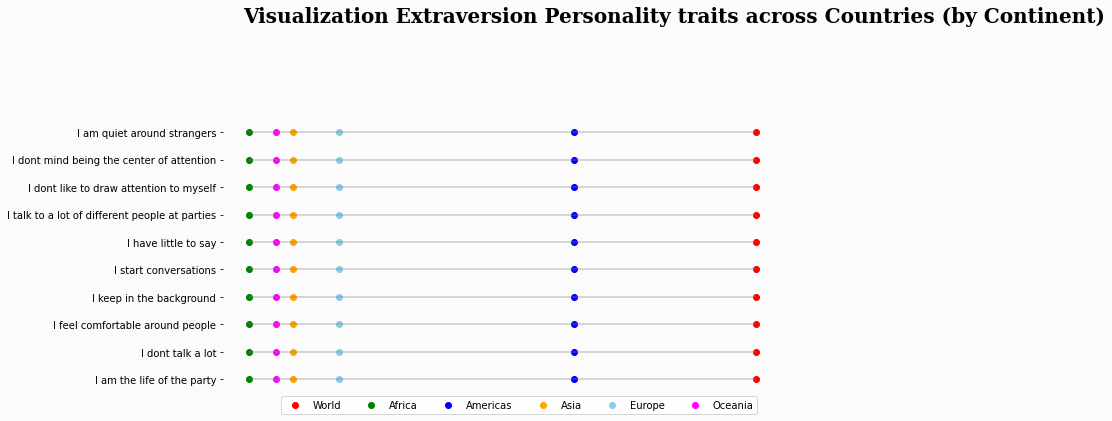

In [16]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(EP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=EP_df["Min"], xmax=EP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(EP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(EP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(EP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(EP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(EP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(EP_df['Oceania'], y_dummy, color='magenta', label='Oceania')

y_label = list(EP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Extraversion Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif') 



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [17]:
display(continents[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

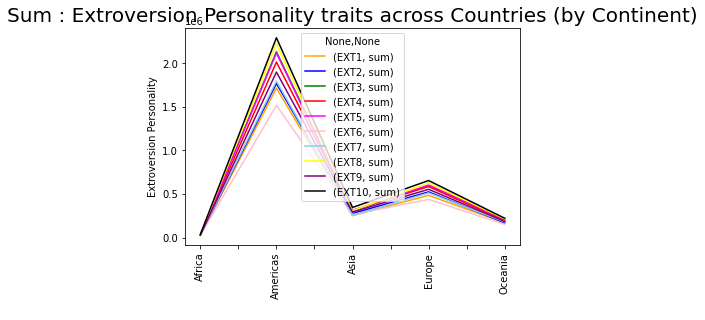

In [18]:
continents[['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Extroversion Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Extroversion Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

# Neuroticism Personality

In [19]:
NP_lst = ['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10'] 
NP_df = continents.groupby(["region"])[NP_lst].count()
NP_df.columns = ['I get stressed out easily', 'I am relaxed most of the time','I worry about things',
                'I seldom feel blue','I am easily disturbed','I get upset easily','I change my mood a lot',
                'I have frequent mood swings','I get irritated easily','I often feel blue']
NP_df = NP_df.loc[['Africa','Americas','Asia','Europe','Oceania'], :]
NP_df = NP_df.T

NP_df["World"] = NP_df.sum(axis=1)
NP_df = NP_df.sort_values(by="World", ascending=True)
NP_df["Min"] = NP_df.min(axis=1)
NP_df["Max"] = NP_df.max(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


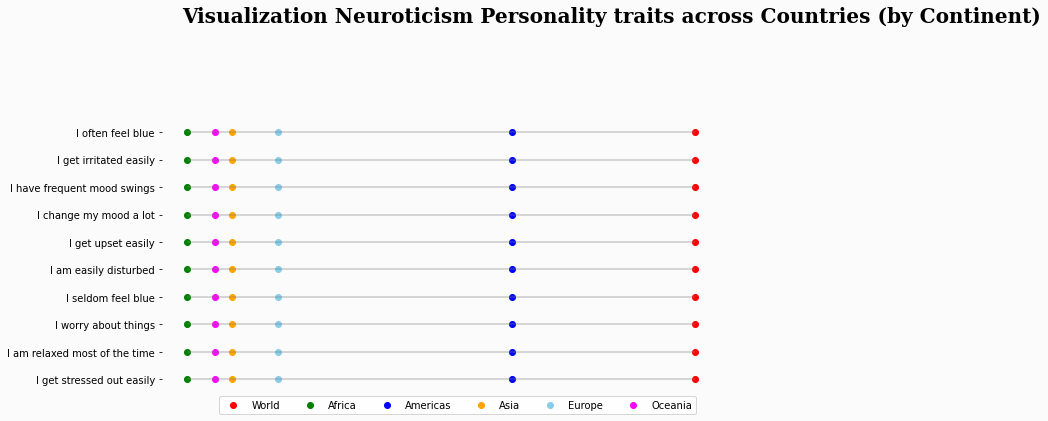

In [20]:
# Setting up figure and axes
fig = plt.figure(figsize=(10,5)) # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color

y_dummy = np.arange(1,len(NP_df.index)+1)

ax0.hlines(y=y_dummy, xmin=NP_df["Min"], xmax=NP_df["Max"], color='grey', alpha=0.4, zorder=3)
ax0.scatter(NP_df['World'], y_dummy, color='red', label='World')
ax0.scatter(NP_df['Africa'], y_dummy, color='green', label='Africa')
ax0.scatter(NP_df['Americas'], y_dummy, color='blue', label='Americas')
ax0.scatter(NP_df['Asia'], y_dummy, color='orange', label='Asia')
ax0.scatter(NP_df['Europe'], y_dummy, color='skyblue', label='Europe')
ax0.scatter(NP_df['Oceania'], y_dummy, color='magenta', label='Oceania')

y_label = list(NP_df.index)
y_label.insert(0, "")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax0.set_yticklabels(y_label)
ax0.set_xticklabels([])
ax0.tick_params(bottom=False)
   
ax0.text(-100, 14, 
         'Visualization Neuroticism Personality traits across Countries (by Continent)', 
         fontsize=20, fontweight='bold', fontfamily='serif')



ax0.legend(loc='lower center', ncol=7, bbox_to_anchor=(0.53, -0.1))

for s in ["top","right", "left", "bottom"]:
    ax0.spines[s].set_visible(False)

In [21]:
display(continents[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10','region']].groupby(['region']).agg(["min","max",'mean','sum']).style.background_gradient(cmap="GnBu"))

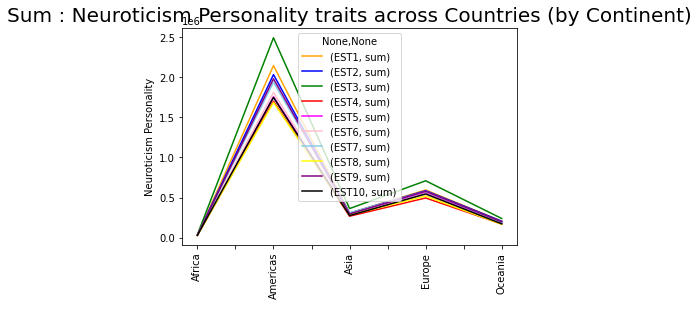

In [22]:
continents[['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10','dateload','region']].groupby(['region']).agg(["sum"]).plot(kind="line",color =["orange","blue","green",'red','magenta','pink','skyblue','yellow','purple','black'])
plt.title("Sum : Neuroticism Personality traits across Countries (by Continent)", fontsize=20)
plt.ylabel("Neuroticism Personality",fontsize=10)
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

# Clustering Participants into 5 Personality Groups

In [23]:
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [24]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,4
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,4
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [25]:
df_model.Clusters.value_counts()

2    226872
4    212666
1    209407
3    200153
0    162952
Name: Clusters, dtype: int64

In [26]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.192412,3.282126,2.791663,3.399246,2.587271,2.758702,2.122331,3.519466,2.653205,3.781887,2.343236,3.618421,2.986511,2.918491,2.324267,2.015489,2.306888,1.927488,2.586412,2.247091,3.037115,2.922824,2.587142,2.757321,3.160734,2.634444,3.009751,2.839947,2.588443,2.972305,3.137494,2.835835,3.662692,2.415227,2.363438,2.747386,3.371293,2.519147,2.762194,3.335197,3.537097,1.976073,3.615243,2.057802,3.623110,2.041767,3.884009,3.113837,3.693542,3.667730
1,3.469660,1.945838,4.337305,2.220699,4.262847,1.667294,3.883609,2.811267,3.740658,2.516626,2.320887,3.821443,3.153768,3.283625,2.112752,1.898098,2.107804,1.674175,2.114394,1.717345,1.892793,4.431136,1.828372,4.247489,1.857015,3.847345,1.588156,4.097919,4.100321,4.194898,3.718453,2.575401,4.193356,1.894392,3.142340,2.276696,3.872053,1.932734,3.583395,3.876575,3.884846,1.753824,4.081764,1.794930,4.158166,1.654214,4.314631,3.234319,4.096310,4.295000
2,3.451215,1.914410,3.794241,2.504593,4.042279,1.831570,3.654105,2.768530,3.763272,3.000101,3.808698,2.928572,4.241978,2.413828,3.284041,3.463398,3.802840,3.452229,3.653368,3.169413,2.158257,4.273031,2.652443,4.183319,2.000551,3.998069,1.856417,3.897907,4.131211,3.845812,2.961207,3.599408,3.842643,3.230072,2.240660,3.515731,3.462111,2.823958,2.950849,3.481355,3.738914,2.117026,4.246024,1.966796,3.957315,1.771876,3.963098,3.373797,4.189023,4.200576
3,1.812249,3.622479,2.234096,4.051606,2.288030,3.189500,1.746749,4.065135,2.180587,4.472124,4.250973,2.458499,4.504524,2.145444,3.559372,3.861666,3.992116,3.762846,4.007914,3.932806,2.497120,3.335054,2.605072,3.808092,2.582185,3.825653,2.738960,3.410371,3.649488,3.048263,2.804280,3.358661,3.812533,3.478489,2.091540,3.502730,3.559007,3.045585,2.776596,3.308039,3.501631,2.381688,4.064676,2.136386,3.434737,2.085909,3.678526,3.179867,4.277218,3.724706
4,2.117212,3.314977,3.087884,3.669778,2.948210,2.715305,2.196872,4.006249,2.320902,4.139886,3.492862,3.088176,4.146253,2.611461,2.814282,2.777731,2.859202,2.420363,2.964306,2.704255,1.888910,3.931498,1.691248,4.347968,1.992425,4.139369,2.021856,3.977980,4.168428,3.715493,3.831031,2.235623,4.294965,2.022707,3.231650,2.082011,4.160595,2.019415,3.825487,3.887500,3.573044,2.136928,3.891586,2.063014,3.725833,1.969045,4.009165,2.983500,4.263625,3.812415


In [27]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.908831,2.527430,2.851003,2.914990,3.121021
1,3.085580,2.420429,3.208545,3.106539,3.326800
2,3.072432,3.421837,3.299702,3.210799,3.352445
3,2.966255,3.647616,3.150026,3.173746,3.246534
4,3.051728,2.987889,3.187518,3.159098,3.242815


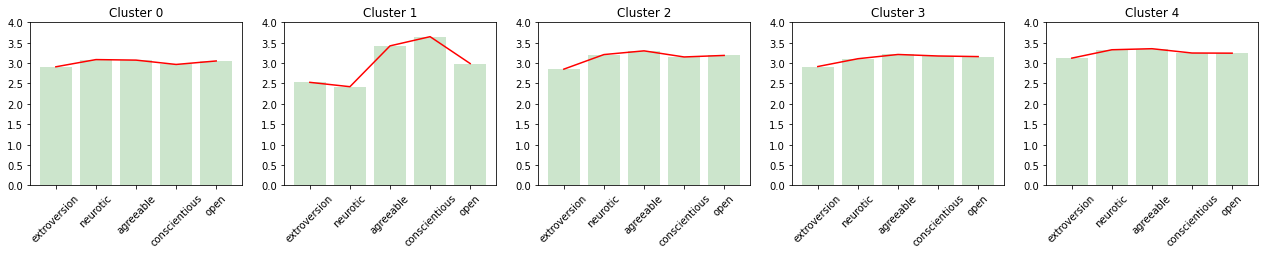

In [28]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

 # PCA Method :
1. Standardize the range of continuous initial variables
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
4. Create a feature vector to decide which principal components to keep
5. Recast the data along the principal components axes
* [Link for more information ](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In [29]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.619820,-1.418484,1
1,0.681180,2.350652,4
2,-0.239906,1.603160,4
3,0.621891,0.815660,0
4,-4.676060,1.762046,1


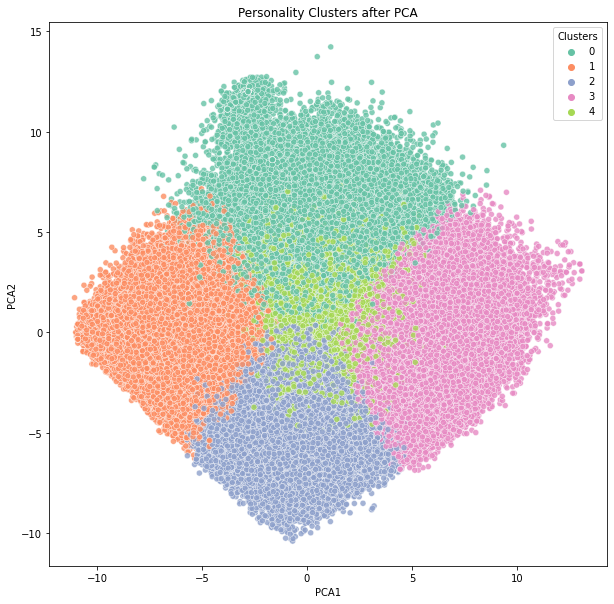

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

# MY DataBase
    you can changet it with your own answers and give it a try 

In [31]:
d={'EXT1':[3],'EXT2':[2],'EXT3':[3],'EXT4':[2],'EXT5':[4],'EXT6':[3],'EXT7':[4],'EXT8':[4],'EXT9':[3],'EXT10':[3],
   'EST1':[3],'EST2':[2],'EST3':[4],'EST4':[3],'EST5':[2],'EST6':[3],'EST7':[2],'EST8':[2],'EST9':[4],'EST10':[2],
   'AGR1':[4],'AGR2':[1],'AGR3':[1],'AGR4':[4],'AGR5':[2],'AGR6':[4],'AGR7':[3],'AGR8':[1],'AGR9':[5],'AGR10':[4],
   'CSN1':[3],'CSN2':[4],'CSN3':[4],'CSN4':[3],'CSN5':[2],'CSN6':[4],'CSN7':[1],'CSN8':[2],'CSN9':[4],'CSN10':[3],
   'OPN1':[2],'OPN2':[2],'OPN3':[5],'OPN4':[2],'OPN5':[4],'OPN6':[1],'OPN7':[4],'OPN8':[1],'OPN9':[3],'OPN10':[4]}
my_data=pd.DataFrame(d)
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3,2,3,2,4,3,4,4,3,3,3,2,4,3,2,3,2,2,4,2,4,1,1,4,2,4,3,1,5,4,3,4,4,3,2,4,1,2,4,3,2,2,5,2,4,1,4,1,3,4


In [32]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [0]


In [33]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.1,2.7,2.9,3.0,2.8,0


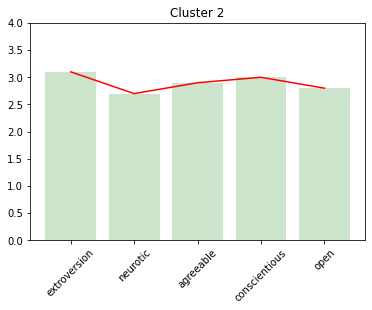

In [34]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);